# Implementation of the NPA hierarchy

## The CHSH inequality

We start by importing the following libraries:

In [4]:
import numpy as np
from ncpol2sdpa import *
import matplotlib.pyplot as plt

Then, we specify the problem:

In [5]:
I = [[ 0,    0,    0 ],
     [ 0,    1,    1 ],
     [ 0,    1,   -1 ]]

# behavior
P = Probability([2, 2], [2, 2])

sdp = SdpRelaxation(P.get_all_operators())

levels = [1, 2, 3, 4, 5]  # Increase hierarchy levels
results = []

# objective function to maximize
objective = -define_objective_with_I(I, P)

Then, we run the SDP program for three levels:

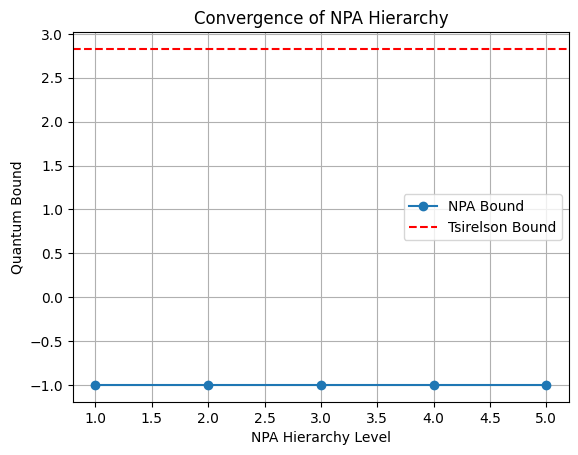

In [6]:
for level in levels:
    sdp.get_relaxation(level, objective=objective,
                       substitutions=P.substitutions,
                       extramonomials=P.get_extra_monomials('AB'))
    sdp.solve(solver='mosek')
    results.append(sdp.dual)  # Store the quantum bound

# Plot the results
plt.plot(levels, results, marker="o", linestyle="-", label="NPA Bound")
plt.axhline(y=2*np.sqrt(2), color="r", linestyle="--", label="Tsirelson Bound")
plt.xlabel("NPA Hierarchy Level")
plt.ylabel("Quantum Bound")
plt.title("Convergence of NPA Hierarchy")
plt.legend()
plt.grid()
plt.show()

In [7]:
print(results)

[-0.9999999990012485, -0.9999999947501542, -0.9999999911941211, -0.9999999998014183, -0.9999999994814803]


Something is not working!

## Our scenario

We are considering the Bell expression

$$\beta_{r_0, r_1} = r_0 \left(\frac{A_0 + A_1}{\sqrt{2}} - B_0 \right) + r_1 \left(\frac{A_0 - A_1}{\sqrt{2}} - B_1 \right) + \frac{1}{2\sqrt{2}} \left((A_0 + A_1)B_0 + (A_0 - A_1)B_1 \right) $$

and we want to find a bound for the Bell expression for every choice of $(r_0, r_1)$.

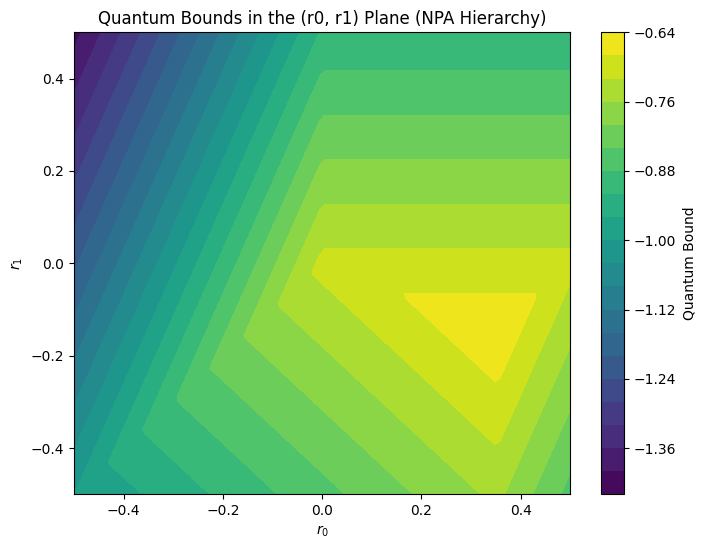

In [23]:
# Define a grid in the (r0, r1) plane
r0_vals = np.linspace(-0.5, 0.5, 100)  # Adjust resolution as needed
r1_vals = np.linspace(-0.5, 0.5, 100)

level = 2  # Increase for better precision

# Store results
quantum_bounds = np.zeros((len(r0_vals), len(r1_vals)))

# Loop over (r0, r1) values
for i, r0 in enumerate(r0_vals):
    for j, r1 in enumerate(r1_vals):
        # Define the Bell operator for each (r0, r1)
        I = [[ 0, (r0 + r1)/np.sqrt(2), (r0 - r1)/np.sqrt(2)],
             [- r0,  1/(2*np.sqrt(2)),  1/(2*np.sqrt(2))],
             [- r1,  1/(2*np.sqrt(2)), -1/(2*np.sqrt(2))]]  # Matrix for beta_{r0, r1}

        P = Probability([2, 2], [2, 2])  # (2,2,2) Bell scenario
        objective = define_objective_with_I(I, P)

        sdp = SdpRelaxation(P.get_all_operators())
        sdp.get_relaxation(level, objective=objective,
                           substitutions=P.substitutions,
                           extramonomials=P.get_extra_monomials('AB'))
        
        # Solve the SDP
        sdp.solve(solver="mosek")  # Use MOSEK for better precision

        # Store the quantum bound at this (r0, r1)
        quantum_bounds[i, j] = sdp.primal

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(r0_vals, r1_vals, quantum_bounds, levels=20, cmap="viridis")
plt.colorbar(label="Quantum Bound")
plt.xlabel("$r_0$")
plt.ylabel("$r_1$")
plt.title("Quantum Bounds in the (r0, r1) Plane (NPA Hierarchy)")
plt.show()